In [1]:
import torch
torch.__version__

'2.3.1+cu118'

# 张量简介
例如，下图图像

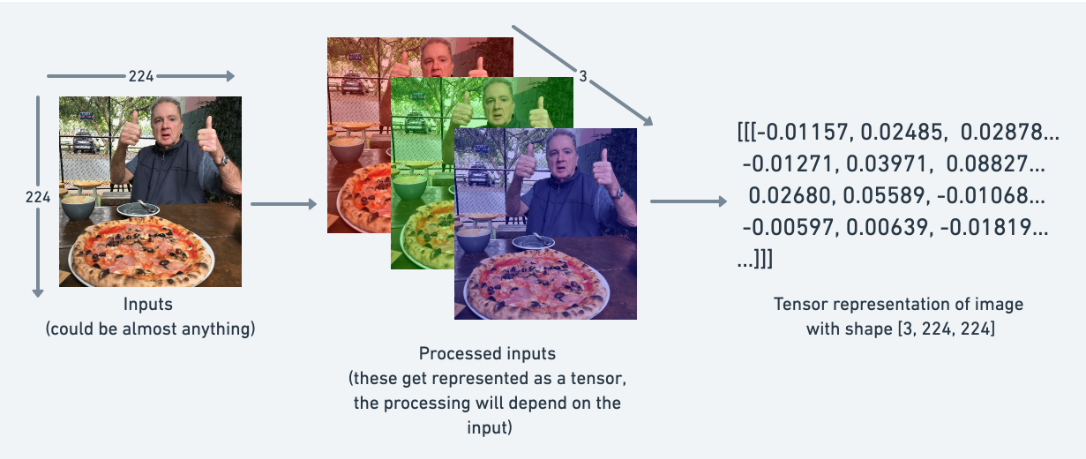




可以将图像表示为形状为`[3, 224, 224]`的张量，意味着`[colour_channels, height, width]`，即图像具有`3`个颜色通道（红，绿，蓝），高度为`224`个像素，宽度为`224`个像素

在张量语言中，张量将具有三个维度，一个用于`colour_channels`，一个用于`height`，一个用于`width`

## 创建张量
第一件事是创建一个标量。

标量是一个单一的数字，在张量语言中，它是一个零维张量。

In [2]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

输出是`tensor(7)`，表明虽然`scalar`的`7`是一个单一的数字，但是它的类型是`torch.Tensor`！

我们可以使用`ndim`来检查张量的维度

In [3]:
scalar.ndim

0

如果想从张量中提取数字的话，使用`item()`方法

In [4]:
# Get the Python number within a tensor (only works with one-element tensors)
scalar.item()

7

下面考察一个`向量`，`向量`是一维张量，可以包含很多数字，用一组`[ ]`括起来的数字。 

In [5]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [6]:
# 查看维度
vector.ndim

1

这有一个窍门来判断PyTorch张量的维数，计算查看一侧的`[`（比如左侧的中括号个数），有几个中括号，向量就是几维向量。

张量的另一个重要的概念是 `shape` 属性。形状会告诉我们它们内部元素的排列方式。
下面查看`vector`的形状

In [7]:
# Check shape of vector
vector.shape

torch.Size([2])